# Bài giảng về Đại số tuyến tính - Phần 2
## MaSSP 2018, Computer Science

Trong phần 1, các bạn đã học cách khởi tạo vector và ma trận cũng như các tính toán trên ma trận. Notebook này sẽ thiên về lab, bài tập, và giới thiệu thêm các hàm, phép toán thông dụng với vector, ma trận, và giữa vector và ma trận với nhau.
* Vector
    - các cách khởi tạo thường dùng: arange, linspace, random 
    - norm 
    - tính min, max, mean, sum
* Ma trận
    - norm
    - tính min, max, mean, sum
* Các phép toán giữa vector và ma trận
    - reshape
    - broadcasting 

# 1. Các phép toán với vector

## 1. 1 Các cách khởi tạo vector đặc biệt
Trước hết chúng ta hãy ôn lại cách khởi tạo một vector từ `list` hoặc `tuple` của Python bằng hàm array của numpy:

In [2]:
import numpy as np

# from 1-dimesional array
a = np.array([1.5, 0.0, 0.8])
print(a)

[1.5 0.  0.8]


Trong nhiều trường hợp, chúng ta cần tạo những vector đặc biệt, ví dụ vector chứa những phần tử có giá trị tăng dần hoặc ngẫu nhiên. Các hàm [arange](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.arange.html#numpy.arange), [linspace](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.linspace.html#numpy.linspace), và [rand](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand) giúp ta khởi tạo được những vector như vậy.

Hàm arange cho phép tạo những dãy tăng dần hay giảm dần, với đầu vào là giá trị bắt đầu của dãy, giá trị chặn trên (exclusive) của dãy, và bước nhảy là một tự nhiên.

In [3]:
# with integer step
a = np.arange(10, 15, 1)
print(a)
# [10, 11, 12, 13, 14]

b = np.arange(11, 10, -0.2)
print(b)
# [ 11.   10.8  10.6  10.4  10.2]

# hàm arange tự hiểu 10 là chặn trên, 0 là giá trị bắt đầu, và bước nhảy là 1 trong trường hợp này 
c = np.arange(10)
print(c)
# [0 1 2 3 4 5 6 7 8 9]

[10 11 12 13 14]
[11.  10.8 10.6 10.4 10.2]
[0 1 2 3 4 5 6 7 8 9]


Khi ta biết giá trị bắt đầu và giá trị kết thúc, cũng như số phần tử muốn có, ta sử dụng hàm linspace.

In [4]:
# with non-integer step
a = np.linspace(2.0, 3.0, num=5)
print(a)
# [ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]

[2.   2.25 2.5  2.75 3.  ]


Yếu tố ngẫu nhiên có thể được tìm thấy trong nhiều hiện tượng, sự việc trong khoa học và đời sống. Một ví dụ thường gặp đó là khi gieo xúc sắc 6 mặt, kết quả thu được mỗi lần gieo là ngẫu nhiên, có thể thu được mặt 1, 2, 3, 4, 5, hay 6, và xác suất thu được các mặt là như nhau (với điều kiện xúc sắc bình thường!).

Trong khoa học, khi đo lường một đại lượng vật lý nào đó, ví dụ như hiệu điện thế, ta luôn đối mặt với những sai số ngẫu nhiên đến từ môi trường, khó có thể khắc phục được. Để tính đến những yếu tố nhiễu đó, ta thường coi chúng đến từ một `normal distribution`, kí hiệu là $N(\mu, \sigma^2)$. Phần này sẽ được giải thích trong bài giảng về xác suất, thống kê tiếp theo, nên lúc này, các bạn chỉ cần làm quen sơ qua các hàm rand và randn trong numpy thôi nhé.

In [10]:
# from uniform distribution
a = np.random.rand(3,2)
print(a)
# [[ 0.65539839  0.31324931]
#  [ 0.49746522  0.40978874]
#  [ 0.58603861  0.85287283]]

# from standard normal distribution
a = np.random.randn(3,2)
print(a)
# [[ 0.71564826,  0.78572601]
#  [-0.04637402, -0.58368628]
#  [-1.25782822,  1.00658686]]

# with N(5, 4)
b =  2 * np.random.randn(3,2)
print(b)
# [[ 3.53328499  5.15966328]
#  [ 3.38333745  4.522973  ]
#  [ 2.6586514   4.8483927 ]]

[[0.43337105 0.78259642]
 [0.72161202 0.17031522]
 [0.537043   0.03242111]]
[[-0.55777851 -0.71413973]
 [-0.88380287 -0.33973767]
 [ 1.55593069  1.74731288]]
[[-0.13405305  0.71023814]
 [ 2.11275871 -1.54980133]
 [ 3.78636585 -0.05374747]]


__Checkpoint 1__: Quay trở lại với bài tập vẽ đồ thị trong video giới thiệu về iPython notebook mà MaSSP đã giới thiệu với các bạn, chúng ta sẽ ôn lại các dùng arange, linspace, và rand để vẽ lại đồ thị biến thiên hiệu điện thế với thời gian có kèm yếu tố nhiễu.
$$V_{(t)} = V_0sin(2\pi*t)$$
$$V_0 = 170 V$$
$$t = 0..2 s$$
![](images/voltage.png)

1. Hãy sử dụng hàm arange hoặc linspace để thiết lập $ts$ và $Vs$, và vẽ đồ thị như đã làm trong video.
2. Giả sử trong mỗi lần đo, hiệu điện thế đều bị lệch đi một giá trị $\epsilon$ ngẫu nhiên trong khoảng từ $-0.75V$ tới $+0.75V$. Hãy tính lại $Vs$ và vẽ lại đồ thị.

$$V_{(t)} = V_0sin(2\pi*t) + \epsilon$$


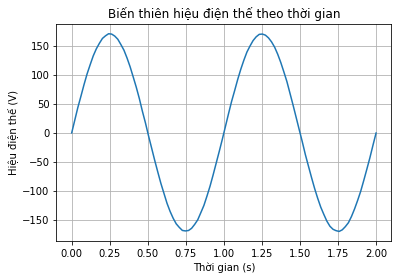

In [48]:
import matplotlib.pyplot as plt
t = np.linspace(0,2,100)
Vo=170
Vt=Vo*np.sin(2*np.pi*t)
e = np.random.rand(100)*1.5-0.75 
plt.plot(t,Vt+e)
plt.title("Biến thiên hiệu điện thế theo thời gian")
plt.ylabel("Hiệu điện thế (V)")
plt.xlabel("Thời gian (s)")
plt.grid(True)
plt.show()

## 1.2 Norm
Trong <span style="color:blue">không gian  vector</span>, `norm` là một công cụ để đo độ dài của  vector hay nói cách khác là đo khoảng cách giữa 2 điểm trong không gian.
Đáng lẽ ta phải tìm hiểu không gian  vector là gì các tính chất của nó ra sao để có thể hiểu rõ được độ dài của các  vector và quan hệ của chúng ra sao,
nhưng tạm thời lúc này bạn cứ hiểu nôm na nó là một tập chứa các  vector và khoảng cách 2 điểm như một đường bay nối thẳng 2 điểm đó như ở không gian 2 chiều nhé.
Nếu có dịp tôi sẽ trình bày kĩ hơn về không gian  vector sau.

Thường một norm cấp $ p $ (kí hiệu: $ L^p $) hay sử dụng trong học máy được mô tả bằng công thức:

$$ |x|_p = \Bigg(\sum_i{|x_i|^p}\Bigg)^ \frac{1}{p} $$

Trong đó $ p \in \mathbb{R} $ và $ p \ge 1 $, còn $ x_i $ là phẩn tử thứ $ i $ của  vector $x$.
Dễ nhận thấy rằng một norm không thể nào nhỏ hơn $ 0 $ được, vì làm gì có khoảng cách nào âm đúng không.

Ví dụ trong <span style="color:blue">không gian Euclide $n$ chiều</span>, ta có độ dài của  vector chính là một norm cấp 2 ($ L^2 $): $\displaystyle |x|_2 = \sqrt{ \sum _{i=1}^n{x_i^2} } $.
Trong đó $ x_i $ là phần tử thứ $ i $ của  vector, hay nói cách khác là tọa độ trên trục thứ $ i $ tương ứng của  vector trong không gian.

<!---Một norm cấp 2 thường được kí hiệu đơn giản là $ |x| $ chứ không phải là $ |x|_2 $ nhé.--->
Trong học máy, ta mặc định $|x|$ là $|x|_2$ do chúng rất hay được sử dụng, nên phần định danh dưới được bỏ đi cho tiện làm việc.
Nếu để ý sẽ thấy, với công thức trên ta có thể dễ dàng tính được $ L^2 $-norm của một vector bằng phép nhân vô hướng của chúng: $|x| = \sqrt{ x^\intercal x}$.

Đôi lúc ta cũng sử dụng cả norm cấp 1 để đo khoảng cách giữa các phần tử tại vị trí 0 và vì trị rất gần với 0 thay vì norm cấp 2.
Vì norm cấp 2 lấy bình phương từng khoảng cách lên sẽ cho số rất nhỏ do khoảng cách giữa chúng đã rất nhỏ rồi, việc này dẫn tới sự triệt tiêu khoảng cách khi tính toán.
Những lúc này ta sẽ sử dụng $ L ^ 1$ để tính toán, vì nó chỉ lấy trị tuyệt đối khoảng cách: $\displaystyle |x|_1 = \sum_i{|x_i|} $.

Cũng có khi ta phải dùng giả norm bậc 0 ($ L^0 $) để đo độ dài của  vector khi nó quá bé để có thể thoải mái tính toán với các norm khác.
Lưu ý, ta không thực sự có $ L^0 $; ta hiểu ngầm với nhau rằng chúng là giả norm. $ L^0 $ được tính đơn giản bằng cách đếm số lượng các phần tử khác 0 của  vector.


In [12]:
# cho vector v = [3 4]
v = np.array([3, 4])
print(v)

# Tính L0
print(np.linalg.norm(v, ord=0))
# 2.0 bằng số phần tử khác 0 của v

# Tính L1
print(np.linalg.norm(v, ord=1))
# 7.0 = 3 + 4

# Tính L2
print(np.linalg.norm(v))  # ord mặc định của hàm norm là 2
# 5.0 = sqrt(3**2 + 4**2)

[3 4]
2.0
7.0
5.0


__Checkpoint 2__: Hãy chọn một giá trị khác cho bậc của norm và tính độ dài norm của $v$ theo bậc mới. Bạn thử kiểm tra xem kết quả thu được khi tính tay có giống với khi dùng hàm $np.linalg.norm$ không?

Một dạng norm khác cũng được sử dụng phổ biến trong học máy là $ L^\infty$ hay còn được gọi là norm lớn nhất (`max norm`) được đo bằng cách lấy trị tuyệt đối của phần tử lớn nhất: $\displaystyle |x|_\infty = \max_i{|x_i|} $.

![p-norm](../HungNgo/Math/img/p-Norm.png)
Hình minh hoạ: vòng tròn đơn vị (`unit circle`), là tập các vectors có norm bằng 1, cho các giá trị $p$ khác nhau. Ngồn: [Wikimedia](https://commons.wikimedia.org/wiki/File:Norm-vergleich.gif).

## 1.3 Tính min, max, mean, và sum 
Các hàm này dùng để tính giá trị nhỏ nhất, lớn nhất, trung bình cộng, và tổng của các phần tử trong vector.

In [49]:
v = np.arange(6)
print(v)
# [0 1 2 3 4 5]

print(np.min(v))
# 0

print(np.max(v))
# 5

print(np.mean(v))
# 2.5

print(np.sum(v))
# 15

[0 1 2 3 4 5]
0
5
2.5
15


Đặc biệt, chúng ta có thể dùng hàm `argmin` và `argmax` để tìm ra vị trí của phần tử nhỏ nhất hay lớn nhất trong vector.

In [4]:
print(np.argmin(v))
# 0

print(np.argmax(v))
# 5

0
5


__Checkpoint 3__: Sau đây là list chiều cao theo cm của các cầu thủ U23 Việt Nam theo [Kênh 14](http://kenh14.vn/tat-tan-tat-ve-profile-va-tinh-trang-moi-quan-he-cua-u23-viet-nam-cho-cac-chi-em-20180123205036088.chn):

In [50]:
players = ["Bùi Tiến Dũng (thủ môn)", "Bùi Tiến Dũng (hậu vệ)", "Nguyễn Trọng Đại", "Bùi Tiến Dụng", "Vũ Văn Thanh", 
           "Đỗ Duy Mạnh", "Nguyễn Quang Hải", "Phan Văn Đức", "Nguyễn Công Phượng", "Lương Xuân Trường", 
           "Đoàn Văn Hậu", "Nguyễn Phong Hồng Duy", "Trần Đình Trọng", "Nguyễn Văn Toàn"]
heights = [181, 176, 184, 176, 170, 180, 168, 170, 168, 178, 185, 168, 174, 169]

0. Hãy biến mảng chiều cao thành dạng vector.
1. Chiều cao trung bình của các cầu thủ là bao nhiêu cm?
2. Cầu thủ nào là người cao nhất?

In [54]:
A = np.array(heights)
print(A.mean())
print(players[A.argmax()])

174.78571428571428
Đoàn Văn Hậu


# 2. Các phép toán với ma trận

## 2.1 Norm
Cách norm áp dụng cho ma trận thì sao?
Norm cho ma trận được tính bằng nhiều phương pháp khác nhau, nhưng trong học máy thường ta chỉ dùng tới chuẩn norm Frobenius - tương tự như $ L^2 $ cho  vector, như sau:

$$ |A|_F = \sqrt{\sum _{i,j}{A _{ij}^2}} $$

Để thực hiện việc tính norm với Numpy, ta có thể sử dụng hàm `norm` trong gói `linalg` (gói đại số tuyến tính) như sau:

In [55]:
# for matrix
v = np.arange(6)
A = v.reshape(2, 3)
print(A)
# [[0 1 2]
#  [3 4 5]]
print(np.linalg.norm(A))
# 7.4161984871 = sqrt(0**2 + 1**2 + 2**2 + 3**2 + 4**2 + 5**2)

[[0 1 2]
 [3 4 5]]
7.416198487095663


## 2.2 Tính min, max, mean, và sum 
Chúng ta đã biết cách tính các giá trị này cho vector - mảng 1 chiều. Tuy nhiên với ma trận là mảng đa chiều, chúng ta cần phải xác định phép tính theo chiều nào của ma trận.

In [57]:
v = np.arange(6)
A = v.reshape(2, 3)
print(A)
# [[0 1 10]
#  [3 4 5]]

# Ví dụ về min, các hàm khác sử dụng tương tự
print(A.min())
# 0 

print(A.min(0))
# [0 1 2]

print(A.min(1))
# [0 3]

[[0 1 2]
 [3 4 5]]
0
[0 1 2]
[0 3]


__Checkpoint 4__: Trong checkpoint này, chúng ta sẽ học cách load một ảnh đen trắng vào một ma trận. Trước hết, từ terminal và trong môi trường Anaconda hiện tại, cài đặt thư viện `pillow` bằng lệnh `conda install pillow`. Nếu thành công, lệnh import sau sẽ không báo lỗi:

In [58]:
from PIL import Image

Tiếp đó, chúng ta sẽ dùng hàm sau để load một hình ảnh vào ma trận.

In [59]:
def load_image(filename) :
    img = Image.open(filename)
    img.load()
    data = np.asarray(img, dtype="int32")
    return data

Trong thư mục `images`, các bạn sẽ thấy 2 hình ảnh `MNIST_1.png` và `MNIST_2.png` của số 1 và số 2 tương ứng, được lấy từ bộ dữ liệu chữ viết tay MNIST nổi tiếng.
![one](./images/MNIST_1.png) ![two](./images/MNIST_2.png) 

Sau đây ta sẽ load hình ảnh số 1 vào array `num_one`:

In [60]:
num_one = load_image('./images/MNIST_1.png')

1. Tương tự, hãy load hình ảnh số 2 vào array `num_two`
2. Đây là ma trận mấy chiều? Kích thước của từng chiều?
3. Những điểm ảnh đen sẽ có giá trị là bao nhiêu? Tương tự với những điểm ảnh trắng?
4. Bằng cách nhìn vào 2 hình ảnh, theo bạn ma trận nào sẽ có giá trị trung bình của các điểm ảnh lớn hơn? Bạn có thể dùng các hàm đã học ở trên để kiểm chứng không?

In [61]:
num_two = load_image('./images/MNIST_2.png')

In [62]:
print(num_one)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1 168 242  28   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10 228 254 100   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 190 254 122   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  83 254 162   

# 3. Các phép toán giữa vector và ma trận

## 3.1 Reshape
Các mảng trong Numpy đều định quy định bằng một <span style="color:blue">khung (`shape`)</span> với các chiều tương ứng với các chiều của mảng.
Ví dụ như  vector (mảng 1 chiều) có 10 phần tử sẽ có khung là (10,),
ma trận (mảng 2 chiều) có 5 hàng và 3 cột sẽ có khung là (5, 3).

Đôi lúc ta cần biến đổi hình dạng của các mảng này cho phù hợp với bài toán của ta như biến đối mảng 1 chiều thành 2 chiều ( vector thành ma trận).
Để làm được việc này ta có thể sử dụng phép biến hình `np.reshape(a, newshape)` của Numpy cực dễ dàng:

In [66]:
# Identity matrix
a = np.eye(3,5)
print(a)
print(a.shape)
# (5, 3)

# reshape matrix to a column vector
b = a.reshape(15)
print(b.shape)
# (15,)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(3, 5)
(15,)


Vậy phép biến hình `reshape` được thực hiện ra sao?

Đầu tiên, số phần tử cần phải được giữ nguyên sau khi biến hình.
Ví dụ ở trên ta có một ma trận chéo kích thước (5, 3) có số phần tử là 15, nên khi biến nó thành  vector thì  vector này cũng phải có kích thước là 15 tương ứng.

Tiếp theo là cách tổ chức các phần tử khi biến hình.
Numpy cho phép ta thực hiện biến hình với 3 kiểu sắp xếp phần tử như sau:

* `C`: Cho phép ta nhặt phần tử từ mảng cũ ra theo thứ tự ngôn ngữ lập trình `C`, tức là tọa độ sau sẽ thay đổi nhanh hơn tọa độ trước. Cụ thể là phần từ phía sau của `A[1, 2]` là `A[1, 3]`. Lưu ý rằng, thứ tự này là giá trị mặc định của `reshape`.
* `F`: Cho phép ta nhặt phần tử từ mảng cũ ra theo thứ tự ngôn ngữ lập trình `Fortran`, tức là tọa độ trước sẽ thay đổi nhanh hơn tọa độ sau. Cụ thể là phần từ phía sau của `A[0, 1]` là `A[1, 1]`
* `A`: Cho phép ta nhặt phần từ theo kiểu `F` nếu mảng cũ của ta được tổ chức dưới dạng bộ nhớ liên tục của Fortran. Còn các trường hợp khác nó sẽ nhặt theo kiểu `C`. Lưu ý rằng, kiểu `F` và `C` chỉ đề cập tới thứ tự địa chỉ khi lập trình chứ không phải địa chỉ trong bộ nhớ máy tính.

> Tổ chức dưới dạng bộ nhớ liên tục có nghĩa là thứ tự của phần tử trong mảng đúng với thứ tự liên tục trong bộ nhớ máy tính.
Ví dụ, với `Fortran` hai phần tử `A[0, 0]` và `A[1, 0]` sẽ có địa chỉ bộ nhớ cạnh nhau theo đúng thứ tự đó, còn với `C` thì `A[0, 0]` và `A[0, 1]` sẽ có địa chỉ bộ nhớ cạnh nhau theo đúng thứ tự đó.
Tham khảo thêm trên [StackOverflow](https://stackoverflow.com/a/26999092/3431378).

In [26]:
a = np.array([[1,2,3], [4,5,6]])
np.reshape(a, 6, order='C')

array([1, 2, 3, 4, 5, 6])

In [68]:
a = np.array([[1,2,3], [4,5,6]])
np.reshape(a, (3,2), order='F')

array([[1, 5],
       [4, 3],
       [2, 6]])

## 3.2 Tự động mở rộng Broadcasting
Một trong những tính năng đặc biệt của Numpy là khả năng tự mở rộng mảng (`broadcasting`), nhờ có tính năng này mà ta có thể thực hiện được các phép toán của các hàm phổ quát (universal functions).
Khi thực hiện phép toán giữa 2 mảng *không* cùng số chiều với nhau, Numpy sẽ tự mở rộng mảng có số chiều ít hơn lên cho bằng với mảng có số chiều lớn hơn.
Việc này được thực hiện bằng cách lặp đi lặp lại 1 số lần nào đó của mảng có số chiều nhỏ hơn cho tới khi đạt được số chiều mảng kia.

Một số ví dụ cụ thể:

In [78]:
A = np.array([(10, 8, 9), (5, 6, 4)])
#b = np.arange(2)
b = np.arange(2).reshape(2,1)
print(A)
print(b)
# A + b or b + A
C = b+A
print(C)
# [[10  9 11]
#  [ 5  7  6]]

# b * A or A * b
C = b * A
print(C)
# [[ 0  8 18]
#  [ 0  6  8]]

[[10  8  9]
 [ 5  6  4]]
[[0]
 [1]]
[[10  8  9]
 [ 6  7  5]]
[[0 0 0]
 [5 6 4]]


<!---{{< /codeblock >}}--->

Nhìn vào ví dụ trên ta có thể thấy  vector `b` đã tự động mở rộng số hàng của mình cho bằng với số hàng của ma trận `A` để thực hiện các phép toán với `A`.
Việc mở rộng này là được áp dụng cho tất cả các hàm phổ quát của Numpy,
tức là không chỉ 2 phép cộng và nhân phía trên ta còn thực hiện được với nhiều phép toán khác như phép chia, phép trừ, phép lấy mũ,...